  <a href="https://colab.research.google.com/drive/1ziIquy4_2jMDkNaQcsT80BRIZ7tVWxgu#scrollTo=FeTglYkWctm6" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth             = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive             = GoogleDrive(gauth)

In [5]:
link       = 'https://drive.google.com/file/d/1cNYMsPEeecKsJH1x-1VIMcrCBsyAomUb/view?usp=sharing'

# to get the id part of the file
id         = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train.csv')
downloaded.GetContentFile('test.csv')

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df_1 = pd.read_csv('train.csv')
df_1.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_2 = pd.read_csv('test.csv')
df_2.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data = np.array(df_1)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [12]:
Y_train

array([3, 8, 2, ..., 6, 5, 3])

In [13]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 1 1 ... 1 1 1] [3 8 2 ... 6 5 3]
0.10994915254237288
Iteration:  10
[9 3 2 ... 2 2 5] [3 8 2 ... 6 5 3]
0.14679661016949153
Iteration:  20
[9 3 2 ... 2 9 5] [3 8 2 ... 6 5 3]
0.18189830508474578
Iteration:  30
[1 3 2 ... 2 9 1] [3 8 2 ... 6 5 3]
0.20767796610169492
Iteration:  40
[1 3 2 ... 2 9 1] [3 8 2 ... 6 5 3]
0.22657627118644066
Iteration:  50
[1 3 2 ... 2 9 1] [3 8 2 ... 6 5 3]
0.24589830508474575
Iteration:  60
[1 3 7 ... 2 9 2] [3 8 2 ... 6 5 3]
0.27591525423728813
Iteration:  70
[1 3 7 ... 3 9 3] [3 8 2 ... 6 5 3]
0.32108474576271184
Iteration:  80
[3 3 4 ... 3 7 3] [3 8 2 ... 6 5 3]
0.3766440677966102
Iteration:  90
[3 3 4 ... 2 7 3] [3 8 2 ... 6 5 3]
0.42727118644067796
Iteration:  100
[3 3 4 ... 2 4 3] [3 8 2 ... 6 5 3]
0.47411864406779664
Iteration:  110
[3 8 4 ... 2 4 3] [3 8 2 ... 6 5 3]
0.5145254237288136
Iteration:  120
[3 2 4 ... 2 4 3] [3 8 2 ... 6 5 3]
0.5473559322033898
Iteration:  130
[3 2 2 ... 2 4 3] [3 8 2 ... 6 5 3]
0.5734915254237288
Iterati

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  3


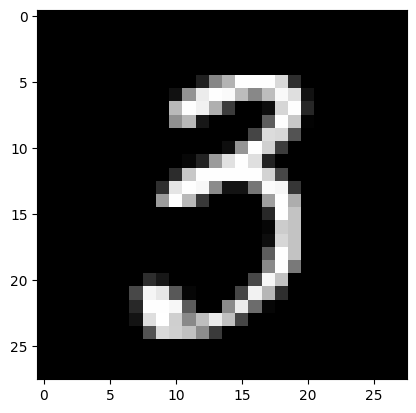

In [18]:
test_prediction(0, W1, b1, W2, b2)

Prediction:  [2]
Label:  8


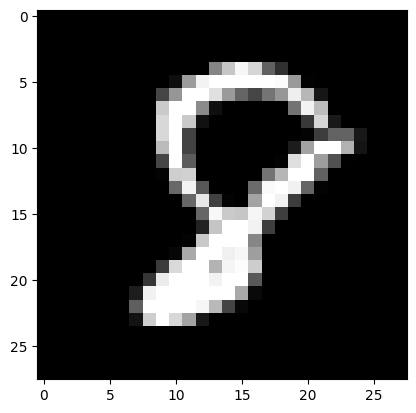

In [19]:
test_prediction(1, W1, b1, W2, b2)

Prediction:  [8]
Label:  2


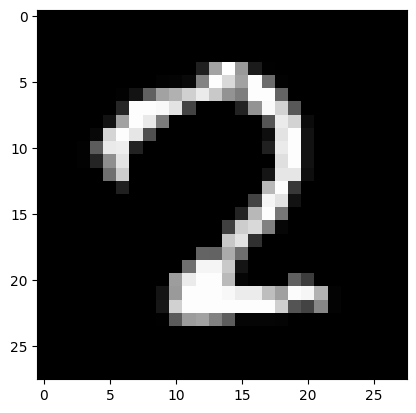

In [20]:
test_prediction(2, W1, b1, W2, b2)

Prediction:  [9]
Label:  9


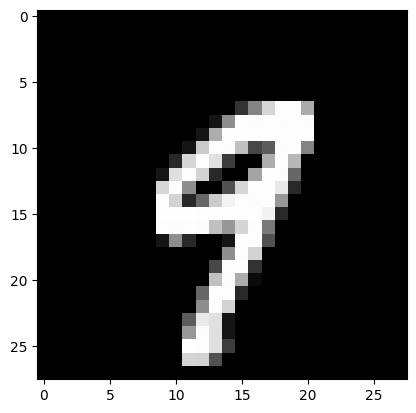

In [21]:
test_prediction(3, W1, b1, W2, b2)

In [22]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 1 8 3 3 1 0 5 2 8 1 6 4 6 2 4 8 5 4 0 0 4 7 3 5 7 1 4 7 9 5 2 1 8 3 3 8
 7 1 4 3 9 2 9 8 4 1 7 8 9 7 8 0 1 5 9 8 9 0 6 6 7 7 1 0 3 5 8 0 3 3 6 9 4
 8 6 6 7 4 0 7 8 0 8 3 8 1 1 8 3 7 4 8 8 7 2 2 5 4 0 2 7 6 0 9 0 6 9 7 8 2
 0 2 6 3 6 5 6 0 6 9 5 1 1 6 8 9 1 6 8 5 4 2 2 0 1 2 1 9 8 3 5 0 2 0 6 3 6
 4 2 1 8 4 5 7 7 2 2 1 4 7 2 7 7 5 0 3 7 9 7 9 1 6 8 7 0 2 1 6 3 1 2 0 4 0
 2 0 8 9 9 6 6 1 1 5 4 5 3 7 4 5 8 3 7 4 2 6 0 4 9 1 7 9 6 5 0 6 1 8 4 1 4
 2 0 5 6 7 0 0 3 9 9 0 8 9 1 1 2 8 3 2 6 0 9 4 9 7 9 9 2 6 9 7 1 9 1 9 0 6
 3 6 1 1 1 2 6 5 1 1 9 0 0 4 9 2 3 8 5 0 8 5 3 4 8 5 1 5 0 7 6 3 0 6 4 8 9
 9 3 3 0 9 7 9 1 3 3 3 3 5 4 2 0 5 3 1 3 8 9 9 0 7 3 6 2 4 2 8 6 4 8 9 0 9
 1 6 8 4 6 0 6 0 5 4 4 9 4 1 1 2 5 7 4 6 5 8 3 2 5 4 0 5 6 4 5 9 9 0 8 2 6
 2 1 3 8 1 9 0 3 7 6 9 5 0 8 3 1 0 3 9 9 4 9 9 9 2 0 1 0 5 4 0 1 7 1 5 3 8
 1 6 1 2 9 3 8 5 1 9 7 2 9 6 2 7 2 4 5 1 2 6 7 4 1 9 5 7 5 8 7 9 1 8 6 0 1
 9 9 2 1 3 8 1 8 7 5 1 0 4 8 4 4 8 2 7 8 3 3 5 7 0 5 5 1 9 2 7 6 8 7 5 6 5
 1 3 3 7 1 4 6 2 0 2 3 2 

0.837